In [15]:
import pandas as pd
import csv
import json
import numpy as np
from census import Census
import requests
from us import states
from api_key import weather_key
import matplotlib.pyplot as plt

In [4]:
file_path = 'final_accident.csv'

final_accident_df = pd.read_csv(file_path)
final_accident_df.head()

,Date,Time,Start_Time,Start_Lat,Start_Lng,City,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition
0,2019-12-26,17:09:52,2019-12-26 17:09:52,40.884850,-95.800362,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair
1,2019-12-26,17:10:32,2019-12-26 17:10:32,40.889641,-95.798630,Thurman,IA,2019-12-26 17:15:00,31.0,31.0,10.0,CALM,0.0,0.0,Fair
2,2019-12-31,23:49:36,2019-12-31 23:49:36,42.313499,-83.091225,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy
3,2019-12-31,23:50:02,2019-12-31 23:50:02,42.398125,-83.109009,Detroit,MI,2019-12-31 23:53:00,28.0,17.0,7.0,WSW,13.0,0.0,Cloudy
4,2019-12-31,23:29:03,2019-12-31 23:29:03,39.754967,-75.276283,Swedesboro,NJ,2019-12-31 23:54:00,43.0,36.0,10.0,WNW,14.0,0.0,Mostly Cloudy


In [6]:
final_accident_df.describe()

,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,953733.000000,953733.000000,936596.000000,804535.000000,935298.000000,893690.000000,734636.000000
mean,36.692206,-96.665776,60.744718,60.161543,9.070157,7.426030,0.006961
std,4.840517,17.375819,19.486831,22.647872,2.867206,5.307131,0.060485
min,24.555269,-124.534439,-33.000000,-59.000000,0.000000,0.000000,0.000000
25%,33.743729,-117.616121,48.000000,45.000000,10.000000,3.500000,0.000000
50%,35.971110,-93.121780,63.000000,64.000000,10.000000,7.000000,0.000000
75%,40.538670,-81.236946,75.000000,77.000000,10.000000,10.000000,0.000000
max,49.002201,-67.703370,170.600000,115.000000,130.000000,255.000000,25.000000


In [25]:
# #identify outliers in df
# low_temps = final_accident_df['Temperature(F)'] < -30
# low_temps
# low_temps_all = final_accident_df[low_temps]
# low_temps_all

In [27]:
accidents_vs_weather = final_accident_df.groupby("Temperature(F)").count()['City'] 
accidents_vs_weather = accidents_vs_weather.reset_index()
accidents_vs_weather

,Temperature(F),City
0,-33.0,1
1,-32.8,1
2,-29.0,4
3,-27.9,12
4,-27.4,3
...,...,...
666,112.0,52
667,113.0,32
668,115.0,14
669,118.4,1


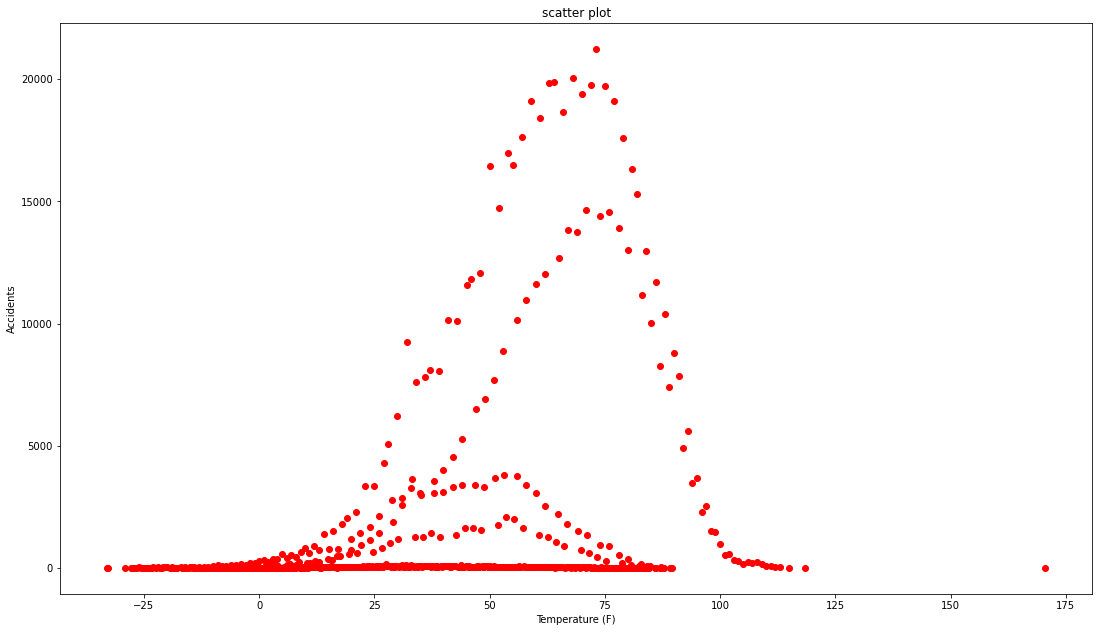

In [28]:
fig, ax = plt.subplots()
ax.scatter(accidents_vs_weather['Temperature(F)'], accidents_vs_weather['City'] , color='r')
ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Accidents')
ax.set_title('scatter plot')
fig.set_size_inches(18.5, 10.5)
plt.show()

In [30]:
# rain = final_accident_df[final_accident_df['Precipitation(in)'] > 1]
# accidents_vs_precipitation = rain.groupby("Precipitation(in)").count()['City'] 
# accidents_vs_precipitation = accidents_vs_precipitation.reset_index()
# accidents_vs_precipitation

In [31]:
#created scatterplot of precipitation by accidents, not a good depiction of data
# fig, ax = plt.subplots()
# ax.scatter(accidents_vs_precipitation['Precipitation(in)'], accidents_vs_precipitation['City'] , color='r')
# ax.set_xlabel('Precipitation (in)')
# ax.set_ylabel('Accidents')
# ax.set_title('scatter plot')
# fig.set_size_inches(15, 10.5)
# plt.show()

In [32]:
labels = ['Spring', 'Summer', 'Winter', 'Fall']
accident_counts = [216266, 208981, 252116, 276370] 

In [36]:
label = [labels]
totals = [accident_counts]
colors = ["green", "yellow", "lightblue", "orange"]

<ipython-input-37-5ca9c7ca9e2c>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(totals, labels = labels,


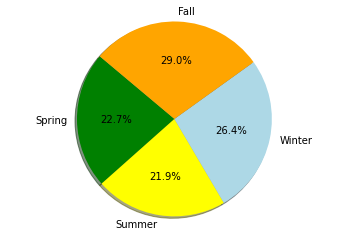

<Figure size 720x720 with 0 Axes>

In [37]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(totals, labels = labels, 
        colors = colors, autopct="%1.1f%%", shadow=True, startangle = 140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#print the final product to the screen
fig = plt.figure(figsize=(10,10))
plt.show()